# Plotting the incidences of BW counties

In [1]:
import pandas as pd    # Pandas is a library to analyse various data structures
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Here we read the csv-file holding the data.
# Note: the separator is a ; instead of a comma, all NA-values gave to be skipped
df_csv = pd.read_csv('/Users/greiner/Programming/Python/FreiburgSeminar/Infizierte.csv', sep=';',na_filter=False)
keys=df_csv.keys()
# Let us pack the counties names into a dictionary and number them
# e.g. {'Biberach': 1}
nkreise=np.arange(len(df_csv.to_numpy()[:,0]))
dict_kreise = dict(zip(df_csv.to_numpy()[:,0],nkreise))
#
df_csv = pd.read_csv('/Users/greiner/Programming/Python/FreiburgSeminar/Infizierte220111.csv',header=None, sep=';',na_filter=False)
data=df_csv.to_numpy()

In [3]:
# transform data to float
irange=np.arange(data.shape[0])
jrange=np.arange(1,data.shape[1])
datafloat=np.zeros(data.shape)
dataint=np.zeros(data.shape)
for i in irange: 
    for j in jrange:
        if data[i,j] =='': 
            datafloat[i,j]=0.
            dataint[i,j]=0
        else:
            datafloat[i,j]=float(data[i,j])
            dataint[i,j]=int(data[i,j])
#
kreisliste = ['Emmendingen', 'Freiburg im Breisgau (Stadtkreis)','Ortenaukreis']
EWZahl = np.ones(44)
EWZahl[36] = 230940
EWZahl[6] = 166862
EWZahl[20] = 432580

<IPython.core.display.Javascript object>


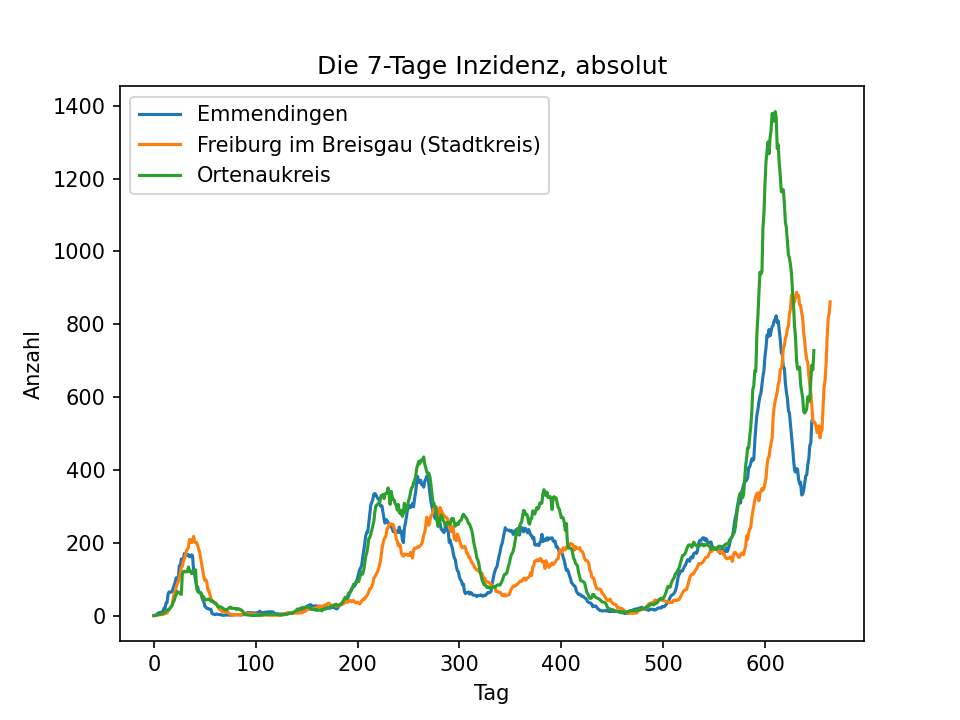

[Text(0, 0.5, 'Anzahl')]

In [9]:
%matplotlib notebook
fig, ax = plt.subplots() # let us plot the data
for kreis in kreisliste:
#for i in np.arange(44):
    factor=1.e5/EWZahl[dict_kreise[kreis]]
    #factor = 1.
    #y = np.flip(datafloat[dict_kreise[kreis]])
    y = np.flip(datafloat[dict_kreise[kreis],1:])
    y14 = np.roll(y,14)
    y14[:13] = 0
    delta = y  - y14
    deltabool = delta > 0
    ax.plot(factor*delta[deltabool], label=kreis)
    #ax.plot(y, label=kreis)
#
ax.legend()
ax.set_title('Die 7-Tage Inzidenz, absolut')
ax.set(xlabel='Tag')
ax.set(ylabel='Anzahl')

In [ ]:
dict_kreise

In [ ]:
EWZahl = np.ones(44)
EWZahl[36] = 230940
EWZahl[6] = 166862
EWZahl[20] = 432580

In [ ]:
df_dict_kreise = pd.DataFrame(dict_kreise.items())
df_dict_kreise.to_csv("Landkreise.dat",sep='\t')

In [10]:
dfEWZ_csv = pd.read_csv('/Users/greiner/Programming/Python/FreiburgSeminar/EWZLandkreise.csv', sep=';',na_filter=False)
dict_EWZkreise = dict(dfEWZ_csv.to_numpy())

In [13]:
dict_EWZkreise

{'Rhein-Neckar-Kreis': 548233,
 'Ludwigsburg, Landkreis': 544971,
 'Esslingen, Landkreis': 533617,
 'Karlsruhe, Landkreis': 446852,
 'Ortenaukreis': 432580,
 'Rems-Murr-Kreis': 427286,
 'Böblingen, Landkreis': 392898,
 'Heilbronn, Landkreis': 346363,
 'Ostalbkreis': 314294,
 'Mannheim': 309721,
 'Karlsruhe': 308436,
 'Reutlingen, Landkreis': 287497,
 'Konstanz, Landkreis': 286876,
 'Ravensburg, Landkreis': 285888,
 'Breisgau-Hochschwarzwald, Landkreis': 264867,
 'Göppingen, Landkreis': 258781,
 'Rastatt, Landkreis': 232091,
 'Freiburg im Breisgau': 230940,
 'Lörrach, Landkreis': 228842,
 'Tübingen, Landkreis': 228471,
 'Bodenseekreis': 217901,
 'Schwarzwald-Baar-Kreis': 212872,
 'Biberach, Landkreis': 202250,
 'Enzkreis': 199752,
 'Alb-Donau-Kreis': 198204,
 'Schwäbisch Hall, Landkreis': 197860,
 'Zollernalbkreis': 189862,
 'Waldshut, Landkreis': 171237,
 'Emmendingen, Landkreis': 166862,
 'Calw, Landkreis': 160149,
 'Heidelberg, kreisfreie Stadt': 158741,
 'Neckar-Odenwald-Kreis': 143

In [38]:
for mystr in dict_kreise.keys():
    print(mystr)
    if(any(key.startswith(mystr) for key in dict_EWZkreise.keys())):
        print(mystr,key)

Alb-Donau-Kreis
Alb-Donau-Kreis Biberach
Biberach
Biberach Biberach
Böblingen
Böblingen Biberach
Bodenseekreis
Bodenseekreis Biberach
Breisgau-Hochschwarzwald
Breisgau-Hochschwarzwald Biberach
Calw
Calw Biberach
Emmendingen
Emmendingen Biberach
Enzkreis
Enzkreis Biberach
Esslingen
Esslingen Biberach
Freudenstadt
Freudenstadt Biberach
Göppingen
Göppingen Biberach
Heidenheim
Heidenheim Biberach
Heilbronn
Heilbronn Biberach
Hohenlohekreis
Hohenlohekreis Biberach
Karlsruhe
Karlsruhe Biberach
Konstanz
Konstanz Biberach
Lörrach
Lörrach Biberach
Ludwigsburg
Ludwigsburg Biberach
Main-Tauber-Kreis
Main-Tauber-Kreis Biberach
Neckar-Odenwald-Kreis
Neckar-Odenwald-Kreis Biberach
Ortenaukreis
Ortenaukreis Biberach
Ostalbkreis
Ostalbkreis Biberach
Rastatt
Rastatt Biberach
Ravensburg
Ravensburg Biberach
Rems-Murr-Kreis
Rems-Murr-Kreis Biberach
Reutlingen
Reutlingen Biberach
Rhein-Neckar-Kreis
Rhein-Neckar-Kreis Biberach
Rottweil
Rottweil Biberach
Schwäbisch Hall
Schwäbisch Hall Biberach
Schwarzwald-B

In [40]:
dict_EWZkreise

{'Rhein-Neckar-Kreis': 548233,
 'Ludwigsburg, Landkreis': 544971,
 'Esslingen, Landkreis': 533617,
 'Karlsruhe, Landkreis': 446852,
 'Ortenaukreis': 432580,
 'Rems-Murr-Kreis': 427286,
 'Böblingen, Landkreis': 392898,
 'Heilbronn, Landkreis': 346363,
 'Ostalbkreis': 314294,
 'Mannheim': 309721,
 'Karlsruhe': 308436,
 'Reutlingen, Landkreis': 287497,
 'Konstanz, Landkreis': 286876,
 'Ravensburg, Landkreis': 285888,
 'Breisgau-Hochschwarzwald, Landkreis': 264867,
 'Göppingen, Landkreis': 258781,
 'Rastatt, Landkreis': 232091,
 'Freiburg im Breisgau': 230940,
 'Lörrach, Landkreis': 228842,
 'Tübingen, Landkreis': 228471,
 'Bodenseekreis': 217901,
 'Schwarzwald-Baar-Kreis': 212872,
 'Biberach, Landkreis': 202250,
 'Enzkreis': 199752,
 'Alb-Donau-Kreis': 198204,
 'Schwäbisch Hall, Landkreis': 197860,
 'Zollernalbkreis': 189862,
 'Waldshut, Landkreis': 171237,
 'Emmendingen, Landkreis': 166862,
 'Calw, Landkreis': 160149,
 'Heidelberg, kreisfreie Stadt': 158741,
 'Neckar-Odenwald-Kreis': 143